### The XOR case but with an additional term to take into account the regularization

In [4]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def der_sigmoid(x):
    return np.exp(x)/(1+np.exp(x))**2

In [6]:
def run(a1,y,alpha,syn1,syn2,la,niter=1000):
    synl1=np.copy(syn1)
    synl2=np.copy(syn2)
    ntest=len(y)#number of observations in the test sample

    error1=np.zeros((niter))

    for i in range(niter):
        der23 = np.zeros(synl2.shape)
        der12 = np.zeros(synl1.shape)

        for j in range(ntest):#loop on all the observations from the test sample
            # forward propagation
            z2 = np.matmul(synl1,a1[j,:])
            a2 = sigmoid(z2)
    
            z3 = np.matmul(synl2,a2)
            a3 = sigmoid(z3)
            error1[i]+= np.dot(a3-y[j],a3-y[j])
            
            # backpropagation
            D3=(a3-y[j])*der_sigmoid(z3)
            D2=D3*synl2*der_sigmoid(z2)
            #gradient
            der23 += a2*D3
            der12 += np.matmul(np.array([a1[j,:]]).T,np.array([D2])).T

        # update of the weights ; the second term correspond to the regularisation
        synl1 -= alpha*(der12/ntest + la*synl1)
        synl2 -= alpha*(der23/ntest + la*synl2)

    
    # evaluation
    # forward propagation
    z2 = np.matmul(synl1,a1.T)
    a2 = sigmoid(z2)
    
    z3 = np.matmul(synl2,a2)
    a3 = sigmoid(z3)
    print(a3)
    return np.sqrt(error1)

In [7]:
# inital weights
synl1_init = np.array([[0.8,0.2],[0.4,0.9],[0.3,0.5]] )
synl2_init = np.array([0.3,0.5,0.9] )

In [8]:
# training test - i.e. the 4 cases from the XOR
a1 = np.array([[1.,1.],[0.,0.],[1.,0.],[0.,1.]])
y = np.array([0.,0.,1.,1.])

### Different runs with different values of $\alpha$ and $\lambda$

In [9]:
# alpha =1
e1 = run(a1,y,1,synl1_init,synl2_init,0.,10000)
e2 = run(a1,y,1,synl1_init,synl2_init,1.e-10,10000)
e3 = run(a1,y,1,synl1_init,synl2_init,1.e-5,10000)
e4 = run(a1,y,1,synl1_init,synl2_init,1.e-3,10000)

[ 0.02176614  0.07219268  0.95443403  0.95444827]
[ 0.02176619  0.07219275  0.95443398  0.95444822]
[ 0.026744    0.07916724  0.94901214  0.94900613]
[ 0.5  0.5  0.5  0.5]


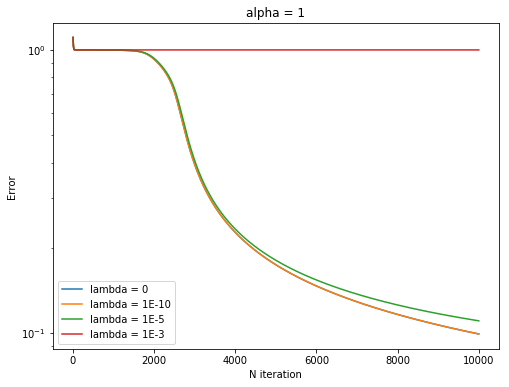

In [10]:
niter=10000
plt.figure(figsize=(8,6))
plt.semilogy(np.arange(niter),e1,np.arange(niter),e2,np.arange(niter),e3,np.arange(niter),e4)
plt.xlabel('N iteration')
plt.title('alpha = 1')
plt.ylabel('Error')
plt.legend(['lambda = 0','lambda = 1E-10','lambda = 1E-5','lambda = 1E-3'])
plt.savefig('fig3.png')
plt.show()

In [11]:
# alpha = 5
e1 = run(a1,y,5,synl1_init,synl2_init,0.,10000)
e2 = run(a1,y,5,synl1_init,synl2_init,1.e-10,10000)
e3 = run(a1,y,5,synl1_init,synl2_init,1.e-5,10000)
e4 = run(a1,y,5,synl1_init,synl2_init,1.e-3,10000)

[ 0.00572001  0.02898227  0.98236357  0.98236482]
[ 0.00572012  0.02898251  0.98236341  0.98236466]
[ 0.01734546  0.05141866  0.96663928  0.96663639]
[ 0.5  0.5  0.5  0.5]


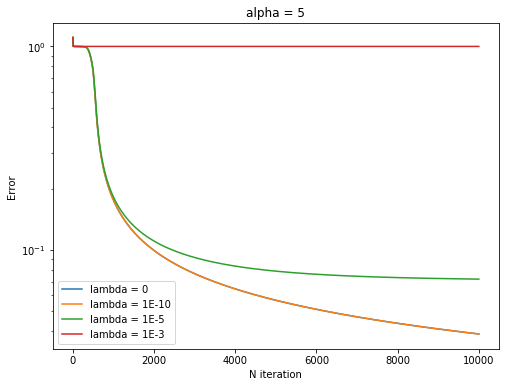

In [12]:
niter=10000
plt.figure(figsize=(8,6))
plt.semilogy(np.arange(niter),e1,np.arange(niter),e2,np.arange(niter),e3,np.arange(niter),e4)
plt.xlabel('N iteration')
plt.title('alpha = 5')
plt.ylabel('Error')
plt.legend(['lambda = 0','lambda = 1E-10','lambda = 1E-5','lambda = 1E-3'])
plt.savefig('fig4.png')
plt.show()

In [13]:
# alpha = 25
e1 = run(a1,y,25,synl1_init,synl2_init,0.,10000)
e2 = run(a1,y,25,synl1_init,synl2_init,1.e-10,10000)
e3 = run(a1,y,25,synl1_init,synl2_init,1.e-5,10000)
e4 = run(a1,y,25,synl1_init,synl2_init,1.e-3,10000)

[ 0.00191362  0.01268216  0.99236617  0.99236735]
[ 0.00191398  0.0126828   0.99236574  0.99236692]
[ 0.01769496  0.04990794  0.96732864  0.96732863]
[ 0.5  0.5  0.5  0.5]


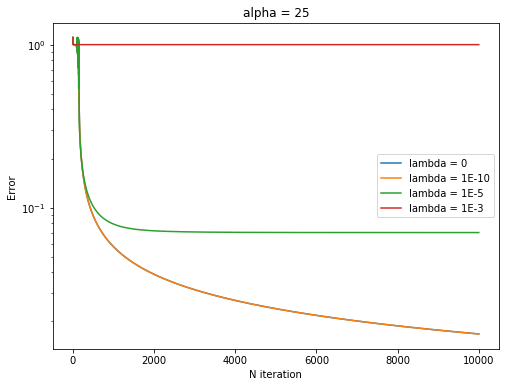

In [14]:
niter=10000
plt.figure(figsize=(8,6))
plt.semilogy(np.arange(niter),e1,np.arange(niter),e2,np.arange(niter),e3,np.arange(niter),e4)
plt.xlabel('N iteration')
plt.title('alpha = 25')
plt.ylabel('Error')
plt.legend(['lambda = 0','lambda = 1E-10','lambda = 1E-5','lambda = 1E-3'])
plt.savefig('fig5.png')
plt.show()

In [15]:
# alpha = 40
e1 = run(a1,y,40,synl1_init,synl2_init,0.,10000)
e2 = run(a1,y,40,synl1_init,synl2_init,1.e-8,10000)
e3 = run(a1,y,40,synl1_init,synl2_init,1.e-5,10000)
e4 = run(a1,y,40,synl1_init,synl2_init,1.e-3,10000)

[ 0.00564131  0.0051798   0.4999118   0.99477765]
[ 0.00941558  0.00398861  0.49980532  0.99311146]
[ 0.04447002  0.03591348  0.94469379  0.95356808]
[ 0.5  0.5  0.5  0.5]


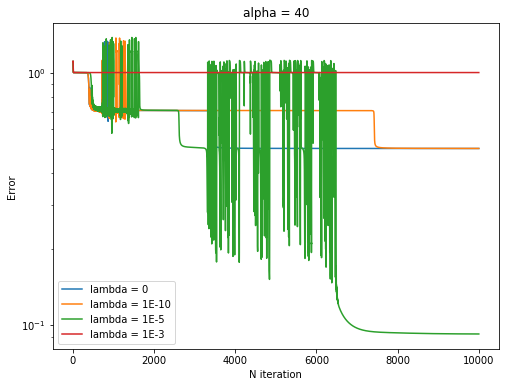

In [16]:
niter=10000
plt.figure(figsize=(8,6))
plt.semilogy(np.arange(niter),e1,np.arange(niter),e2,np.arange(niter),e3,np.arange(niter),e4)
plt.xlabel('N iteration')
plt.title('alpha = 40')
plt.ylabel('Error')
plt.legend(['lambda = 0','lambda = 1E-10','lambda = 1E-5','lambda = 1E-3'])
plt.savefig('fig6.png')
plt.show()